In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

##1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [236]:
data_x, target = sklearn.datasets.fetch_california_housing(as_frame=True, return_X_y=True)
df_housing = pd.concat([data_x, target], axis=1)
print(df_housing.shape)
df_housing.head(3)

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


## 2. Проведите первичный анализ.

In [237]:
# A) Проверка на пропуски
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [238]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [239]:
df_housing.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [240]:
df_housing.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [241]:
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [242]:
# B) Нормализация признака
def normalization(df, column, new_name_col=None):
  if new_name_col is None:
    name_col=f'normal_{column}'
  df_copy=df.copy()
  max_=np.max(df[column])
  min_=np.min(df[column])
  df_copy[name_col] = df_copy[column].apply(lambda x: (x-min_)/(max_-min_))
  df_copy.drop(labels=column, axis=True, inplace=True)
  return df_copy

In [243]:
df_housing_2 = normalization(df_housing, 'Population')
df_housing_2.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude,MedHouseVal,normal_Population
0,8.3252,41.0,6.984127,1.02381,2.555556,37.88,-122.23,4.526,0.008941
1,8.3014,21.0,6.238137,0.97188,2.109842,37.86,-122.22,3.585,0.067210


## 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [244]:
from sklearn.model_selection import train_test_split

In [245]:
df_x = df_housing_2.drop(labels=['MedHouseVal'], axis=True)
Y = df_housing['MedHouseVal']

x_train, x_test, y_train, y_test = train_test_split(df_x, Y, train_size=0.8, random_state=1982)

## 4. Обучите модель регрессии на обучающем множестве

In [246]:
model_linearReg = LinearRegression()

In [247]:
model_linearReg.fit(x_train, y_train)

LinearRegression()

## 5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [248]:
model_linearReg.score(x_test, y_test)

0.6116588851058384

In [249]:
def metrics_(model):
  y_pred_test = model.predict(x_test)
  MAE = sklearn.metrics.mean_absolute_error(y_test, y_pred_test)
  MSE = sklearn.metrics.mean_squared_error(y_test, y_pred_test)
  f2_score = sklearn.metrics.r2_score(y_test, y_pred_test)
  df_metrics_y_test = pd.DataFrame({'MAE': MAE, 'MSE': MSE, 'f2_score': f2_score}, index=['x_test'])
  y_pred_train = model.predict(x_train)
  MAE = sklearn.metrics.mean_absolute_error(y_train, y_pred_train)
  MSE = sklearn.metrics.mean_squared_error(y_train, y_pred_train)
  f2_score = sklearn.metrics.r2_score(y_train, y_pred_train)
  df_metrics_y_train = pd.DataFrame({'MAE': MAE, 'MSE': MSE, 'f2_score': f2_score}, index=['x_train'])

  return pd.concat([df_metrics_y_train, df_metrics_y_test], axis=0)

In [250]:
metrics_(model_linearReg)

,MAE,MSE,f2_score
x_train,0.530953,0.523607,0.604745
x_test,0.533025,0.527666,0.611659


## 6. Обучите дерево решений на обучающем множестве.

In [310]:
# A)
model_tree = DecisionTreeRegressor(random_state=1982, max_depth=10)

In [311]:
model_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=1982)

In [312]:
metrics_(model_tree)

,MAE,MSE,f2_score
x_train,0.323580,0.222953,0.831700
x_test,0.425745,0.400546,0.705215


In [254]:
# B)
from sklearn.tree import plot_tree

In [313]:
# ВАЖНОСТЬ ПРИЗНАКОВ
feature_importances = sorted(zip(model_tree.feature_importances_, x_test.columns), reverse=True)
df_feature_importances = pd.DataFrame({'feature': x_test.columns, 'weights': model_tree.feature_importances_}).sort_values(by='weights', ascending=False)
df_feature_importances

,feature,weights
0,MedInc,0.607990
4,AveOccup,0.131953
5,Latitude,0.072436
6,Longitude,0.070443
1,HouseAge,0.047808
2,AveRooms,0.038175
7,normal_Population,0.017992
3,AveBedrms,0.013202


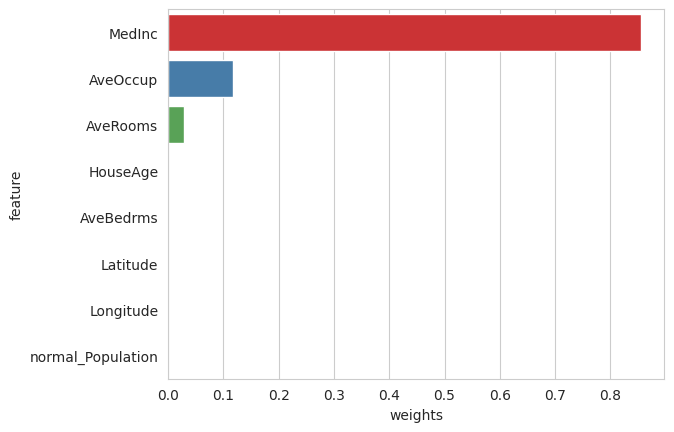

In [256]:
sns.set_style('whitegrid')
sns.barplot(data=df_feature_importances, x='weights', y='feature', hue='feature',  palette='Set1');

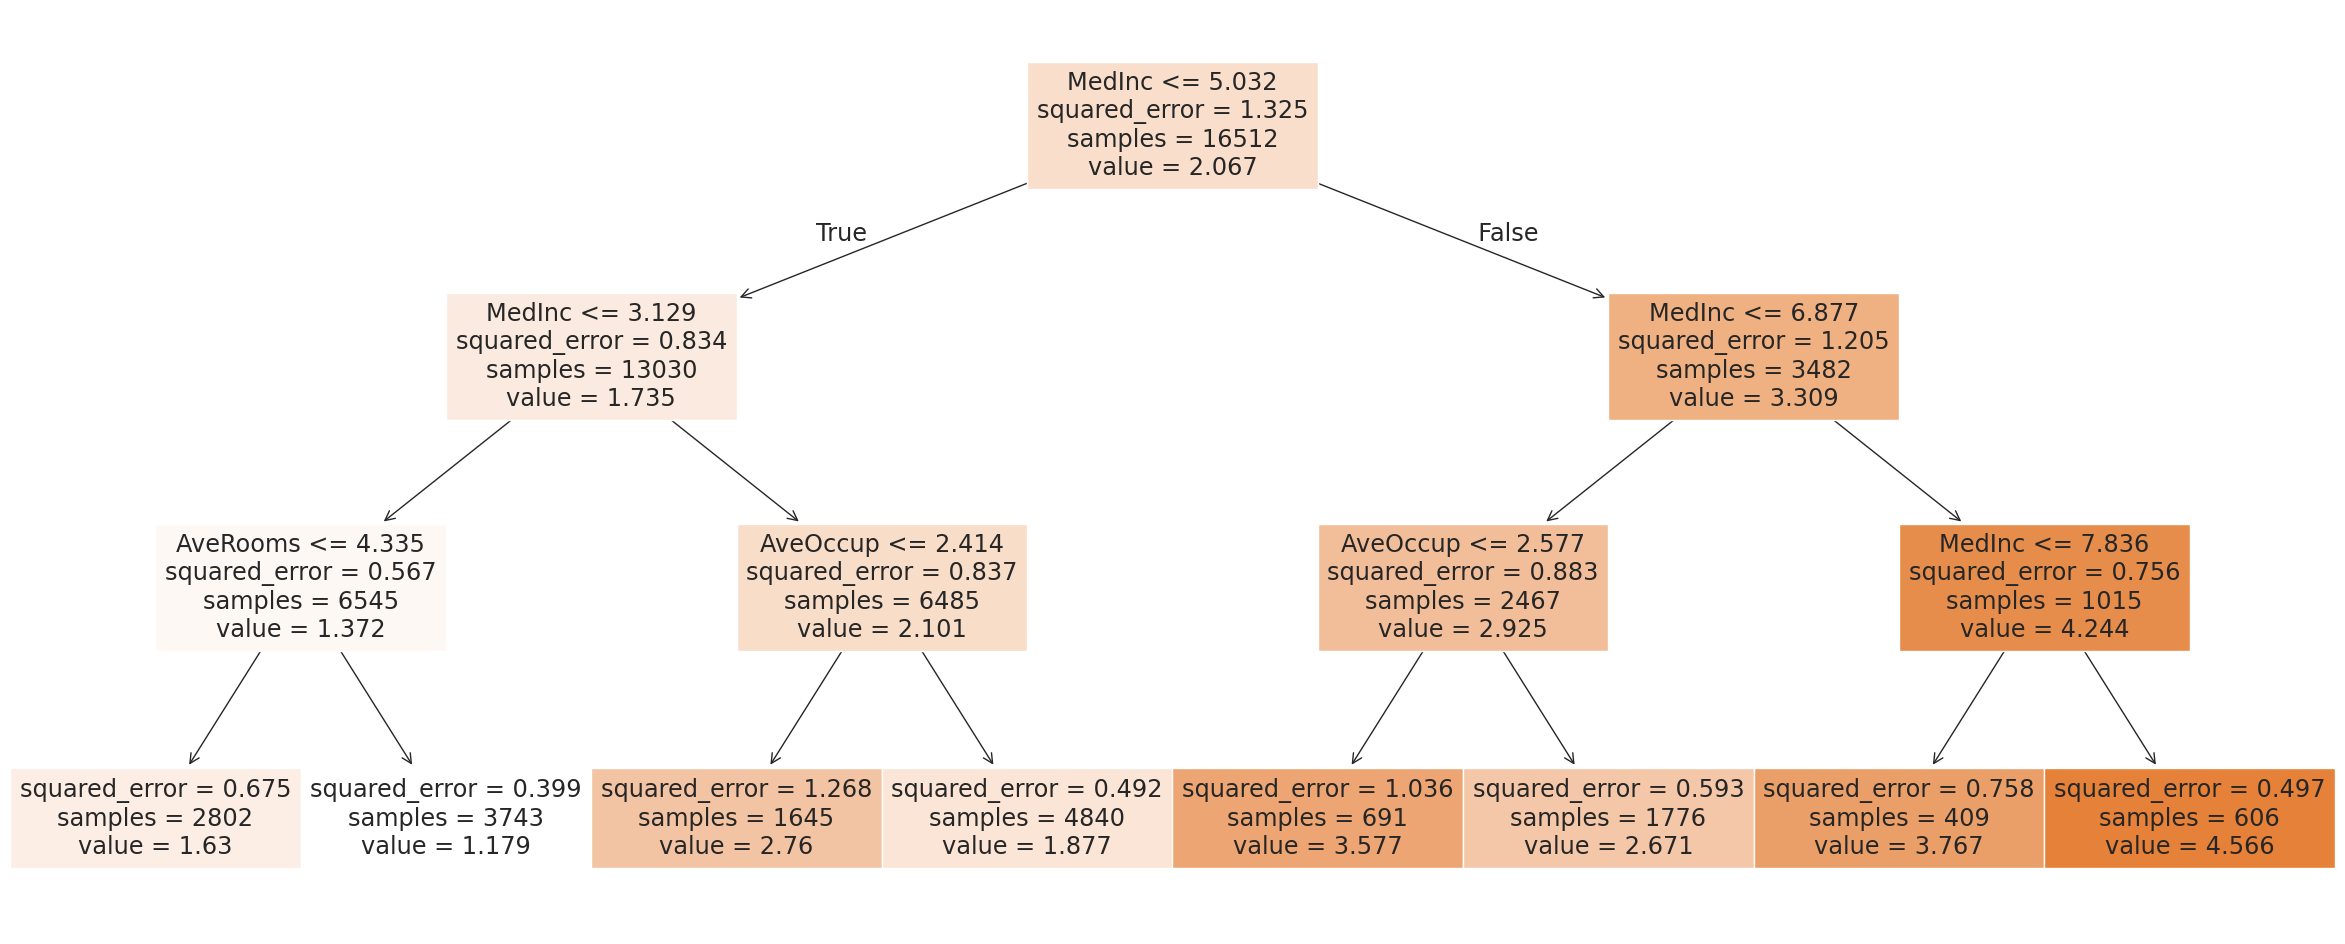

In [257]:
plt.figure(figsize=(30, 12))
plot_tree(model_tree, filled=True, feature_names=x_train.columns, class_names=['MedHouseVal'])
plt.show()

## 7 и 8. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор. Сформулируйте выводы по проделанной работе.


In [329]:
model_tree_1 = DecisionTreeRegressor(random_state=1982, max_depth=10, min_samples_leaf=25) # max_leaf_nodes=1500
model_tree_1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=25, random_state=1982)

In [330]:
# Результаты модели Дерево решений
metrics_(model_tree_1)

,MAE,MSE,f2_score
x_train,0.374984,0.299287,0.774078
x_test,0.417755,0.372879,0.725576


In [331]:
# Результаты модели Линейной регрессии
metrics_(model_linearReg)

,MAE,MSE,f2_score
x_train,0.530953,0.523607,0.604745
x_test,0.533025,0.527666,0.611659


In [333]:
feature_importances_1 = sorted(zip(model_tree_1.feature_importances_, x_test.columns), reverse=True)
df_feature_importances_1 = pd.DataFrame({'feature': x_test.columns, 'weights': model_tree.feature_importances_}).sort_values(by='weights', ascending=False)
df_feature_importances_1

,feature,weights
0,MedInc,0.607990
4,AveOccup,0.131953
5,Latitude,0.072436
6,Longitude,0.070443
1,HouseAge,0.047808
2,AveRooms,0.038175
7,normal_Population,0.017992
3,AveBedrms,0.013202


In [ ]:
# Однозначно модель дерево решений значительно лучше показал результат. Прирост f2_score на тестовых выборках у деревьев составил  18,62%, ошибка MAE снизилась на 21,62%, ошибка MSE снижена на 29,33%.
# Но модель дерево решений очень подвержено переобучению в сравнении с линейной регрессией. Поэтому требуется подбор таких параметров как глубина, максимальное число листов или минимальное число вершин(узлов)
# Самые важные признаки для деревьев оказались такие как: MedInc, AveOccup при глубине равное 3. При увеличении глубины важность остальных признаков возрастает.
# При увеличении глубины выше 13, метрики модели не улучшаются